In [30]:
import heapq
import matplotlib.pyplot as plt

In [31]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [32]:
def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), 0, start, [start]))  # (f(n), g(n), position, path)
    
    visited = set()
    
    while pq:
        f, g, current, path = heapq.heappop(pq)

        if current == goal:
            return path, visited
        
        if current in visited:
            continue
        
        visited.add(current)

        x, y = current
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:  # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                neighbor = (nx, ny)
                if neighbor not in visited:
                    g = g + 1
                    f = g + heuristic(neighbor, goal)
                    heapq.heappush(pq, (f, g, neighbor, path + [neighbor]))

    return None  # No path found

In [33]:
# maze = [
#     [0, 1, 0, 0, 0],
#     [0, 1, 0, 1, 0],
#     [0, 0, 0, 1, 0],
#     [1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 0]
# ]
maze = [
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
]

start = (0, 0)
goal = (9,9)
path, visited = astar(maze, start, goal)
print("Path found:" if path else "No path found")
print(path)

Path found:
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9)]


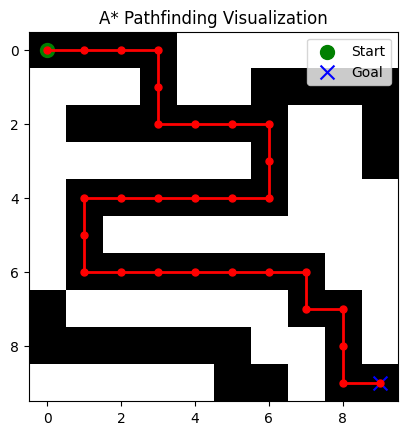

In [34]:
# A* algorithm implementation path visualization
def plot_path(maze, path):          
    plt.imshow(maze, cmap='gray', origin='upper')
    if path:
        x, y = zip(*path)
        plt.plot(y, x, marker='o', color='red', linewidth=2, markersize=5)
    plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='blue', s=100, label='Goal')
    plt.legend()
    plt.title('A* Pathfinding Visualization')
    plt.show()
plot_path(maze, path)

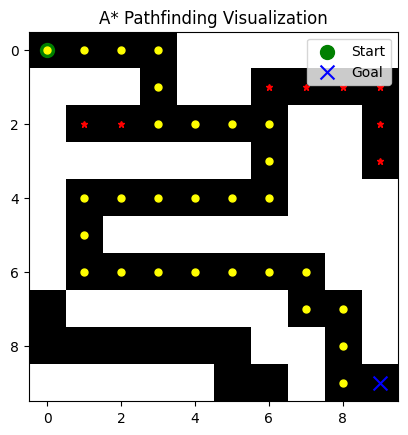

In [42]:
def plot_path(maze, visited, path):          
    plt.imshow(maze, cmap='gray', origin='upper')
    for x, y in visited:
        plt.plot(y, x, marker='*', color='red', linewidth=2, markersize=5)
        if (x, y) in path:
            plt.plot(y, x, marker='o', color='yellow', linewidth=2, markersize=5)

    plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='blue', s=100, label='Goal')
    plt.legend()
    plt.title('A* Pathfinding Visualization')
    plt.show()
plot_path(maze, visited, path)